# Links
https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

In [3]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import pandas as pd # csv
import seaborn
from scipy import interpolate
from scipy.optimize import curve_fit
from mplcursors import cursor

In [110]:
# %matplotlib inline
%matplotlib notebook
# %matplotlib qt

In [5]:
def userPltArgs():
    plotDecorations = \
            {
             'linestyle'       : '-', 
             'color'           : 'royalblue', # line color
             'linewidth'       : 1,
             'marker'          : 'o', # marker shape
             'markerfacecolor' : 'midnightblue', # marker fill color: can be None (default color) or 'None' (alpha color)
             'markeredgecolor' : 'None', # marker edge color
             'markersize'      : 2
            }
    return plotDecorations

In [6]:
def generateLine(k=1, n=100, x0=0, y0=8, m=0, sigma=5):
    x = np.linspace(1,n,n)
    noise = m + np.random.randn(n)*sigma
    y = k*(x - x0) + y0 + noise
    return x, y

def smooth(x, y, step=None):
    if step is None:
        step = len(x) * 10
    bspline = interpolate.make_interp_spline(x, y)
    xSmooth = np.linspace(x.min(), x.max(), step)
    ySmooth = bspline(xSmooth)
    return xSmooth, ySmooth

def linearFit(x, y):
    f = lambda x, k, b: k * x + b
    beta_opt, beta_cov = curve_fit(f, x, y)
    return x, beta_opt[0]*x+beta_opt[1], beta_opt, beta_cov
    

In [32]:
def createPlot(x, y, xerr=None, yerr=None, title='Визуализация $f(x)$', xName='x', yName='y',label='unknown data', plotDecorations=None):
    if plotDecorations is None:
        plotDecorations = dict(
             color           = 'royalblue', # line color
        )
    
    
    plt.figure(figsize=[16, 8], dpi=120)
    plt.title(title)
    plt.ylabel(xName)
    plt.xlabel(yName)

    plt.bar(x, y, label=label, **plotDecorations)
    plt.errorbar(np.arange(len(x)), y, xerr=0, yerr=yerr, capsize=50, ecolor='firebrick', linestyle='None', linewidth=5, barsabove=True)

    
    gap = lambda a, ticks=1: abs(a.max() - a.min()) / len(a) * ticks
    plt.ylim([0, y.max() + gap(y, 1)])
    plt.xticks(x)
    plt.yticks(np.arange(0, y.max() + gap(y, 1), 5))
    plt.grid()
    plt.minorticks_on()
    cursor(hover=True)
    plt.legend(loc='best')
    plt.show()

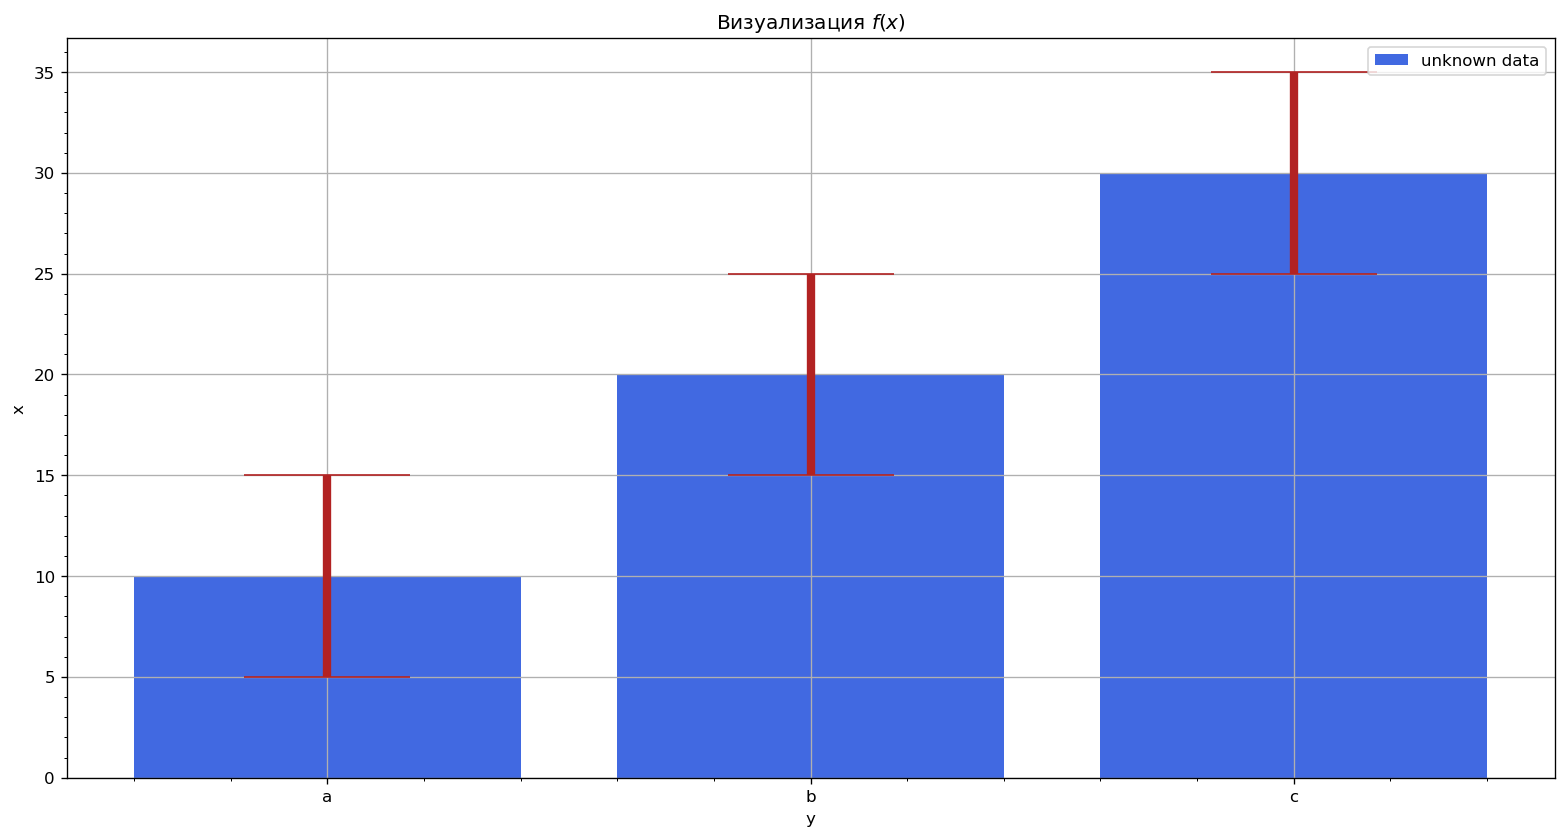

In [41]:
data = ['a', 'b', 'c'],np.array([10, 20, 30])
createPlot(*data, xerr=0, yerr=5)

In [186]:
arr = np.array([[1,2,3]])
np.shape([[1, 2, 3]])

def proxy(**kargs):
    print(kargs)
    
a = dict(x=1, y=2)
print(a)

{'x': 1, 'y': 2}


In [257]:
%%cmd
echo hello

Microsoft Windows [Version 10.0.22621.1702]
(c) Microsoft Corporation. All rights reserved.

C:\Users\alexa\Downloads\Python>echo hello
hello

C:\Users\alexa\Downloads\Python>

In [369]:
import pandas as pd

In [114]:
mydict = {
  "key1":[1, 2],
  "key2":[3, 4],
  "key3":[5, 6],
}

colums = ['s', 2]
# df['index1'] = df.index

df = pd.DataFrame(mydict, colums)

<IPython.core.display.Javascript object>


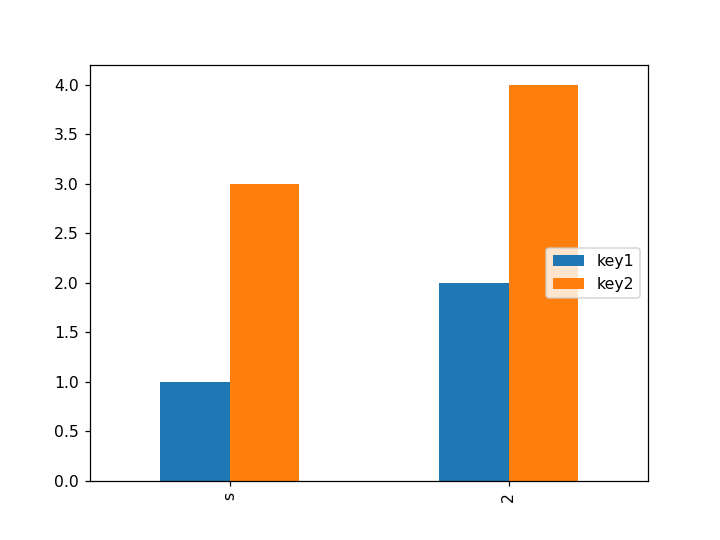

In [115]:
hh = df.set_index(df.index)[['key1', 'key2']].plot.bar()
hh.legend(loc='right')


['A', 'B', 'C', 'D']
          A         B         C         D
0  0.813129  1.488132  0.891271  0.169988
1  0.717308  2.270258  0.108407  0.198886
2  0.452850  0.271241  1.005882  0.759188
3  0.647167  0.378226  0.048862  0.929488
4  1.746787  0.500475  1.572453  0.403924


<IPython.core.display.Javascript object>


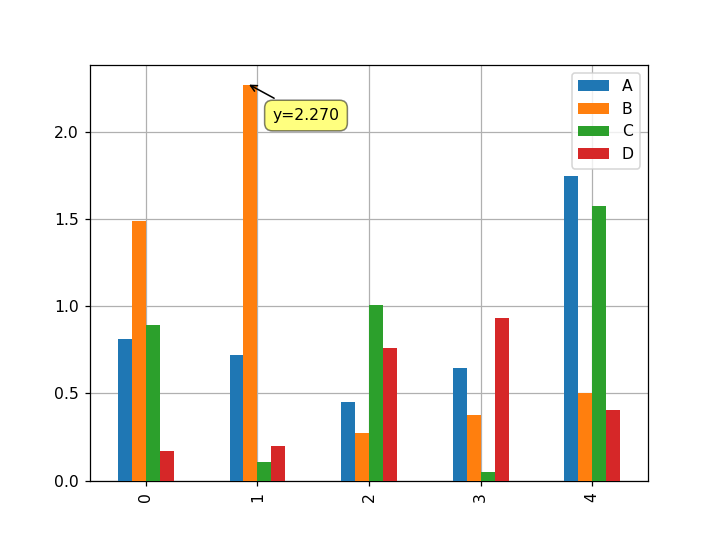

In [116]:
colums=list("ABCD")
print(colums)
df = pd.DataFrame(np.abs(np.random.randn(5, 4)), columns=list("ABCD"))
print(df)
hh = df[colums].plot.bar(zorder=3)
hh.grid(zorder=0)
cursor(hover=True)
# hh.legend(loc='right')